# Part 1

## Import and load

In [95]:
pip install pmdarima

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import statsmodels.tsa.api as tsa
import pmdarima as pm
from pmdarima.arima.utils import ndiffs, nsdiffs
from pmdarima.model_selection import train_test_split
import pmdarima as pm
plt.rcParams['figure.figsize']=(12,3)
pd.set_option('display.max_columns', 1000)

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
path = '/content/drive/MyDrive/zillow_home_values-zipcode.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27442 entries, 0 to 27441
Columns: 284 entries, RegionID to 30112022
dtypes: float64(275), int64(3), object(6)
memory usage: 59.5+ MB


,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,31012000,29022000,31032000,30042000,31052000,30062000,31072000,31082000,30092000,31102000,30112000,31122000,31012001,28022001,31032001,30042001,31052001,30062001,31072001,31082001,30092001,31102001,30112001,31122001,31012002,28022002,31032002,30042002,31052002,30062002,31072002,31082002,30092002,31102002,30112002,31122002,31012003,28022003,31032003,30042003,31052003,30062003,31072003,31082003,30092003,31102003,30112003,31122003,31012004,29022004,31032004,30042004,31052004,30062004,31072004,31082004,30092004,31102004,30112004,31122004,31012005,28022005,31032005,30042005,31052005,30062005,31072005,31082005,30092005,31102005,30112005,31122005,31012006,28022006,31032006,30042006,31052006,30062006,31072006,31082006,30092006,31102006,30112006,31122006,31012007,28022007,31032007,30042007,31052007,30062007,31072007,31082007,30092007,31102007,30112007,31122007,31012008,29022008,31032008,30042008,31052008,30062008,31072008,31082008,30092008,31102008,30112008,31122008,31012009,28022009,31032009,30042009,31052009,30062009,31072009,31082009,30092009,31102009,30112009,31122009,31012010,28022010,31032010,30042010,31052010,30062010,31072010,31082010,30092010,31102010,30112010,31122010,31012011,28022011,31032011,30042011,31052011,30062011,31072011,31082011,30092011,31102011,30112011,31122011,31012012,29022012,31032012,30042012,31052012,30062012,31072012,31082012,30092012,31102012,30112012,31122012,31012013,28022013,31032013,30042013,31052013,30062013,31072013,31082013,30092013,31102013,30112013,31122013,31012014,28022014,31032014,30042014,31052014,30062014,31072014,31082014,30092014,31102014,30112014,31122014,31012015,28022015,31032015,30042015,31052015,30062015,31072015,31082015,30092015,31102015,30112015,31122015,31012016,29022016,31032016,30042016,31052016,30062016,31072016,31082016,30092016,31102016,30112016,31122016,31012017,28022017,31032017,30042017,31052017,30062017,31072017,31082017,30092017,31102017,30112017,31122017,31012018,28022018,31032018,30042018,31052018,30062018,31072018,31082018,30092018,31102018,30112018,31122018,31012019,28022019,31032019,30042019,31052019,30062019,31072019,31082019,30092019,31102019,30112019,31122019,31012020,29022020,31032020,30042020,31052020,30062020,31072020,31082020,30092020,31102020,30112020,31122020,31012021,28022021,31032021,30042021,31052021,30062021,31072021,31082021,30092021,31102021,30112021,31122021,31012022,28022022,31032022,30042022,31052022,30062022,31072022,31082022,30092022,31102022,30112022
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0,107274.0,107076.0,107081.0,107112.0,107325.0,107480.0,107709.0,108092.0,108328.0,108782.0,109187.0,109242.0,109045.0,108514.0,108330.0,108390.0,108548.0,108693.0,108464.0,108504.0,108660.0,108944.0,109056.0,109176.0,109353.0,109930.0,110527.0,111058.0,111451.0,111944.0,112638.0,113249.0,113778.0,114116.0,114439.0,114716.0,114936.0,115268.0,115595.0,116009.0,116287.0,116541.0,116765.0,116910.0,117047.0,117017.0,117089.0,117334.0,118377.0,120021.0,121175.0,122266.0,122411.0,123386.0,123749.0,124320.0,124519.0,125047.0,125855.0,126646.0,127223.0,127524.0,127674.0,127466.0,127361.0,127100.0,126853.0,126429.0,125941.0,125829.0,125646.0,125673.0,125433.0,125490.0,125472.0,125821.0,126221.0,126701.0,127196.0,127713.0,128636.0,129288.0,130104.0,130254.0,130179.0,129824.0,130144.0,130826.0,131616.0,132072.0,132631.0,133130.0,133476.0,133557.0,133467.0,132717.0,131846.0,131063.0,130785.0,130372.0,129904.0,129495.0,128657.0,127506.0,126387.0,125401.0,124254.0,123127.0,122737.0,122663.0,122766.0,122833.0,123068.0,123531.0,123699.0,123799.0,123543.0,123644.0,123923.0,123997.0,124059.0,124305.0,124875.0,125245.0,125125.0,124244.0,122833.0,121687.0,120838.0,120400.0,119954.0,119418.0,118640.0,117478.0,116404.0,115697.0,115251.0,115152.0,115040.0,114719.0,114141.0,112906.0,111876.0,111421.0,111581.0,112113.0,112306.0,112563.0,112831.0,113612.0,1146

In [6]:
# melte the data set
melted = pd.melt(df,id_vars=['RegionID', 'SizeRank', 'RegionName', 'RegionType', 'StateName', 'State', 'City', 'Metro', 'CountyName'],
                 value_name='Home Value',var_name="Date")
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Date,Home Value
0,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,31012000,107261.0
1,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,31012000,222569.0
2,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,31012000,90009.0
3,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,31012000,188096.0
4,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,31012000,275983.0
...,...,...,...,...,...,...,...,...,...,...,...
7546545,80190,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,30112022,193591.0
7546546,65355,30657,18081,zip,PA,PA,Hellertown,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Bucks County,30112022,376523.0
7546547,82217,30657,55366,zip,MN,MN,NaN,NaN,Sibley County,30112022,110082.0
7546548,80581,30657,51009,zip,IA,IA,Calumet,NaN,O Brien County,30112022,75810.0


In [7]:
# convert Date to datetime
melted['Date'] = pd.to_datetime(melted['Date'], format= '%d%m%Y')
melted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7546550 entries, 0 to 7546549
Data columns (total 11 columns):
 #   Column      Dtype         
---  ------      -----         
 0   RegionID    int64         
 1   SizeRank    int64         
 2   RegionName  int64         
 3   RegionType  object        
 4   StateName   object        
 5   State       object        
 6   City        object        
 7   Metro       object        
 8   CountyName  object        
 9   Date        datetime64[ns]
 10  Home Value  float64       
dtypes: datetime64[ns](1), float64(1), int64(3), object(6)
memory usage: 633.3+ MB


In [8]:
# set Date colum
melted.set_index('Date', inplace=True)
melted

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2000-01-31,91940,0,77449,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Harris County,107261.0
2000-01-31,91982,1,77494,zip,TX,TX,NaN,"Houston-The Woodlands-Sugar Land, TX",Fort Bend County,222569.0
2000-01-31,93144,2,79936,zip,TX,TX,El Paso,"El Paso, TX",El Paso County,90009.0
2000-01-31,62080,3,11368,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,188096.0
2000-01-31,62093,4,11385,zip,NY,NY,New York,"New York-Newark-Jersey City, NY-NJ-PA",Queens County,275983.0
...,...,...,...,...,...,...,...,...,...,...
2022-11-30,80190,30657,50160,zip,IA,IA,Martensdale,"Des Moines-West Des Moines, IA",Warren County,193591.0
2022-11-30,65355,30657,18081,zip,PA,PA,Hellertown,"Philadelphia-Camden-Wilmington, PA-NJ-DE-MD",Bucks County,376523.0
2022-11-30,82217,30657,55366,zip,MN,MN,NaN,NaN,Sibley County,110082.0


In [9]:
# filter the state
state = ['CA', 'WA', 'OR', 'AZ', 'NV']
df = melted[melted['State'].isin(state)]
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2000-01-31,95992,5,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,143426.0
2000-01-31,96361,8,91331,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,144841.0
2000-01-31,96193,9,90650,zip,CA,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,163955.0
2000-01-31,96083,12,90201,zip,CA,CA,Bell,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,163273.0
2000-01-31,96816,13,92335,zip,CA,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,110958.0
...,...,...,...,...,...,...,...,...,...,...
2022-11-30,98502,30657,95950,zip,CA,CA,Grimes,NaN,Colusa County,313005.0
2022-11-30,95776,30657,89041,zip,NV,NV,Pahrump,"Pahrump, NV",Nye County,414072.0
2022-11-30,99923,30657,98623,zip,WA,WA,White Salmon,NaN,Klickitat County,729920.0


In [10]:
df.tail()

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2022-11-30,98502,30657,95950,zip,CA,CA,Grimes,NaN,Colusa County,313005.0
2022-11-30,95776,30657,89041,zip,NV,NV,Pahrump,"Pahrump, NV",Nye County,414072.0
2022-11-30,99923,30657,98623,zip,WA,WA,White Salmon,NaN,Klickitat County,729920.0
2022-11-30,99927,30657,98628,zip,WA,WA,Goldendale,NaN,Klickitat County,146513.0
2022-11-30,99841,30657,98522,zip,WA,WA,Chehalis,"Centralia, WA",Lewis County,575200.0


In [11]:
# loc date from 05/2020 to end of data set
df_ts = df.loc['2010':'2020']
df_ts

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2010-01-31,95992,5,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,209250.0
2010-01-31,96361,8,91331,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,257372.0
2010-01-31,96193,9,90650,zip,CA,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,296430.0
2010-01-31,96083,12,90201,zip,CA,CA,Bell,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,271829.0
2010-01-31,96816,13,92335,zip,CA,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,156704.0
...,...,...,...,...,...,...,...,...,...,...
2020-12-31,98502,30657,95950,zip,CA,CA,Grimes,NaN,Colusa County,220881.0
2020-12-31,95776,30657,89041,zip,NV,NV,Pahrump,"Pahrump, NV",Nye County,NaN
2020-12-31,99923,30657,98623,zip,WA,WA,White Salmon,NaN,Klickitat County,538209.0


In [13]:
# save df for using it in Tableau
proccessed_df = df_ts.to_csv('/content/drive/MyDrive/data-for-tableau.csv')

In [14]:
# resample data
df_ts = df_ts.groupby('State')['Home Value'].resample("Y").mean()
df_ts

<ipython-input-14-ab59fff97d01>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  df_ts = df_ts.groupby('State')['Home Value'].resample("Y").mean()


State  Date      
AZ     2010-12-31    169930.889076
       2011-12-31    152272.467002
       2012-12-31    159902.057789
       2013-12-31    183657.225403
       2014-12-31    198551.492521
       2015-12-31    206834.173937
       2016-12-31    217452.799614
       2017-12-31    229066.028099
       2018-12-31    244689.172792
       2019-12-31    257396.582183
       2020-12-31    278841.942045
CA     2010-12-31    415491.808100
       2011-12-31    388468.031550
       2012-12-31    388593.634299
       2013-12-31    454509.845597
       2014-12-31    505808.423831
       2015-12-31    535297.119658
       2016-12-31    569319.272450
       2017-12-31    601938.428066
       2018-12-31    646936.553061
       2019-12-31    649531.475923
       2020-12-31    675124.170696
NV     2010-12-31    189285.319787
       2011-12-31    168931.537037
       2012-12-31    165003.293888
       2013-12-31    199847.532946
       2014-12-31    228975.139535
       2015-12-31    247372.119614
       2016-12-31    265123.976834
       2017-12-31    284543.217949
       2018-12-31    319753.462629
       2019-12-31    337914.425207
       2020-12-31    350564.885423
OR     2010-12-31    224035.019849
       2011-12-31    205273.042225
       2012-12-31    201899.022119
       2013-12-31    216964.502931
       2014-12-31    233022.531108
       2015-12-31    249633.916898
       2016-12-31    272424.454568
       2017-12-31    294524.759060
       2018-12-31    311491.056020
       2019-12-31    323800.937928
       2020-12-31    338782.970027
WA     2010-12-31    250932.487018
       2011-12-31    230557.026098
       2012-12-31    225432.142832
       2013-12-31    240848.444598
       2014-12-31    256869.916239
       2015-12-31    275704.942220
       2016-12-31    302116.532078
       2017-12-31    334494.267926
       2018-12-31    367370.462736
       2019-12-31    381711.638949
       2020-12-31    408430.209929
Name: Home Value, dtype: float64

In [15]:
# unstak
unstacked = df_ts.unstack(level=0)
unstacked

State,AZ,CA,NV,OR,WA
Date,,,,,
2010-12-31,169930.889076,415491.808100,189285.319787,224035.019849,250932.487018
2011-12-31,152272.467002,388468.031550,168931.537037,205273.042225,230557.026098
2012-12-31,159902.057789,388593.634299,165003.293888,201899.022119,225432.142832
2013-12-31,183657.225403,454509.845597,199847.532946,216964.502931,240848.444598
2014-12-31,198551.492521,505808.423831,228975.139535,233022.531108,256869.916239
2015-12-31,206834.173937,535297.119658,247372.119614,249633.916898,275704.942220
2016-12-31,217452.799614,569319.272450,265123.976834,272424.454568,302116.532078
2017-12-31,229066.028099,601938.428066,284543.217949,294524.759060,334494.267926
2018-12-31,244689.172792,646936.553061,319753.462629,311491.056020,367370.462736


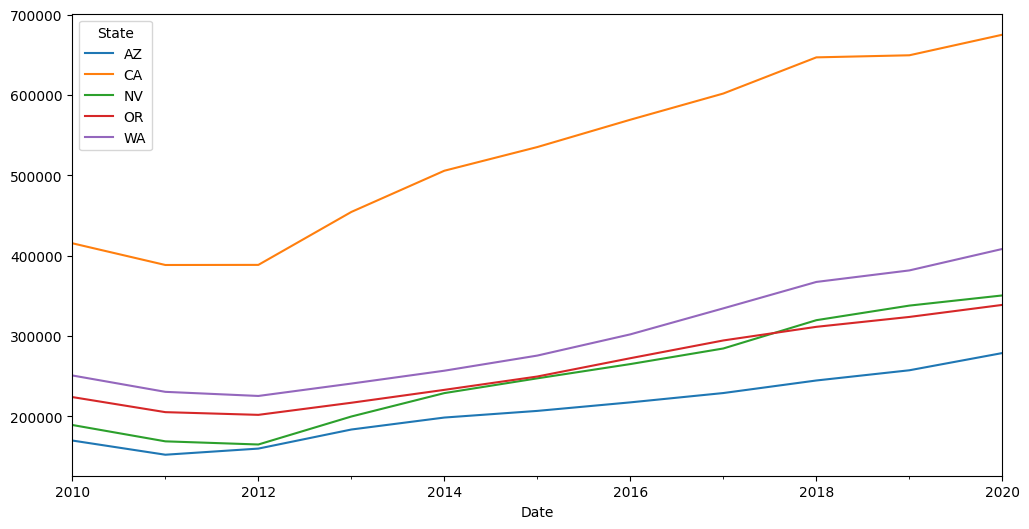

In [16]:
# plot
unstacked.plot(figsize=(12,6))
plt.show()

# Part 2:

# functions

In [17]:
def plot_forecast(ts_train, ts_test, forecast_df, n_train_lags=None,
                  figsize=(10,4), title='Comparing Forecast vs. True Data'):
    ### PLot training data, and forecast (with upper/,lower ci)
    fig, ax = plt.subplots(figsize=figsize)

    # setting the number of train lags to plot if not specified
    if n_train_lags==None:
        n_train_lags = len(ts_train)

    # Plotting Training  and test data
    ts_train.iloc[-n_train_lags:].plot(ax=ax, label="train")
    ts_test.plot(label="test", ax=ax)

    # Plot forecast
    forecast_df['mean'].plot(ax=ax, color='green', label="forecast")

    # Add the shaded confidence interval
    ax.fill_between(forecast_df.index,
                    forecast_df['mean_ci_lower'],
                   forecast_df['mean_ci_upper'],
                   color='green', alpha=0.3,  lw=2)

    # set the title and add legend
    ax.set_title(title)
    ax.legend();

    return fig, ax



In [18]:
# Custom function for Ad Fuller Test
def get_adfuller_results(ts, alpha=.05, label='adfuller', **kwargs): #kwargs for adfuller()
    # Saving each output
    (test_stat, pval, nlags, nobs, crit_vals_d,
    icbest ) = tsa.adfuller(ts, **kwargs)
    # Converting output to a dictionary with the interpretation of p
    adfuller_results = {'Test Statistic': test_stat,
                        "# of Lags Used":nlags,
                       '# of Observations':nobs,
                        'p-value': round(pval,6),
                        'alpha': alpha,
                       'sig/stationary?': pval < alpha}
    return pd.DataFrame(adfuller_results, index =[label])



In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, mean_absolute_percentage_error

def regression_metrics_ts(ts_true, ts_pred, label="", verbose=True, output_dict=False,):
    # Get metrics
    mae = mean_absolute_error(ts_true, ts_pred)
    mse = mean_squared_error(ts_true, ts_pred)
    rmse = mean_squared_error(ts_true, ts_pred, squared=False)
    r_squared = r2_score(ts_true, ts_pred)
    mae_perc = mean_absolute_percentage_error(ts_true, ts_pred) * 100

    if verbose == True:
        # Print Result with label
        header = "---" * 20
        print(header, f"Regression Metrics: {label}", header, sep="\n")
        print(f"- MAE = {mae:,.3f}")
        print(f"- MSE = {mse:,.3f}")
        print(f"- RMSE = {rmse:,.3f}")
        print(f"- R^2 = {r_squared:,.3f}")
        print(f"- MAPE = {mae_perc:,.2f}%")

    if output_dict == True:
        metrics = {
            "Label": label,
            "MAE": mae,
            "MSE": mse,
            "RMSE": rmse,
            "R^2": r_squared,
            "MAPE(%)": mae_perc,
        }
        return metrics



In [20]:
def get_sig_lags(ts, type='ACF', nlags=None, alpha=0.5):

    if type == 'ACF':
        # Running the function used by plot_acf
        corr_values, conf_int = tsa.stattools.acf(ts, alpha=alpha, nlags=nlags)

    elif type=='PACF':
        corr_values, conf_int = tsa.stattools.pacf(ts, alpha=alpha, nlags=nlags)

    else:
        raise Exception("type must be either 'ACF' or 'PACF'")

    # Determine lags
    lags =range(len(corr_values))

    # Create a centered version of the acf_df
    corr_df = pd.DataFrame({type:corr_values,
                            'Lags':lags,
                            'lower ci': conf_int[:,0]-corr_values, # subtract acf from lower ci to center
                            'upper ci': conf_int[:,1]-corr_values, # subtact acf to upper ci to center
                                 })
    corr_df = corr_df.set_index("Lags")

    # Getting filter for sig lags
    filter_sig_lags = (corr_df[type] < corr_df['lower ci']) | (corr_df[type] > corr_df['upper ci'])

    # Get lag #'s
    sig_lags= corr_df.index[filter_sig_lags]
    sig_lags = sig_lags[sig_lags!=0]

    return sig_lags


In [21]:
def plot_acf_pacf(ts, nlags=40, figsize=(10, 5),
                  annotate_sig=False, alpha=.05,
                 acf_kws={}, pacf_kws={},
                  annotate_seas=False, m = None,
                 seas_color='black'):

    fig, axes = plt.subplots(nrows=2, figsize=figsize)


    # Sig lags line style
    sig_vline_kwargs = dict( ls=':', lw=1, zorder=0, color='red')

    # ACF
    tsa.graphics.plot_acf(ts, ax=axes[0], lags=nlags, **acf_kws)

    ## Annotating sig acf lags
    if annotate_sig == True:
        sig_acf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='ACF')
        for lag in sig_acf_lags:
            axes[0].axvline(lag,label='sig', **sig_vline_kwargs )

    # PACF
    tsa.graphics.plot_pacf(ts,ax=axes[1], lags=nlags, **pacf_kws)

    ## Annotating sig pacf lags
    if annotate_sig == True:
        ## ANNOTATING SIG LAGS
        sig_pacf_lags = get_sig_lags(ts,nlags=nlags,alpha=alpha, type='PACF')
        for lag in sig_pacf_lags:
            axes[1].axvline(lag, label='sig', **sig_vline_kwargs)




    ### ANNOTATE SEASONS
    if annotate_seas == True:
        # Ensure m was defined
        if m is None:
            raise Exception("Must define value of m if annotate_seas=True.")

        ## Calculate number of complete seasons to annotate
        n_seasons = nlags//m

        # Seasonal Lines style
        seas_vline_kwargs = dict( ls='--',lw=1, alpha=.7, color=seas_color, zorder=-1)

        ## for each season, add a line
        for i in range(1, n_seasons+1):
            axes[0].axvline(m*i, **seas_vline_kwargs, label="season")
            axes[1].axvline(m*i, **seas_vline_kwargs, label="season")

    fig.tight_layout()

    return fig



In [39]:
# back to data set df the data set befor filter data in first part
df

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2000-01-31,95992,5,90011,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,143426.0
2000-01-31,96361,8,91331,zip,CA,CA,Los Angeles,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,144841.0
2000-01-31,96193,9,90650,zip,CA,CA,Norwalk,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,163955.0
2000-01-31,96083,12,90201,zip,CA,CA,Bell,"Los Angeles-Long Beach-Anaheim, CA",Los Angeles County,163273.0
2000-01-31,96816,13,92335,zip,CA,CA,Fontana,"Riverside-San Bernardino-Ontario, CA",San Bernardino County,110958.0
...,...,...,...,...,...,...,...,...,...,...
2022-11-30,98502,30657,95950,zip,CA,CA,Grimes,NaN,Colusa County,313005.0
2022-11-30,95776,30657,89041,zip,NV,NV,Pahrump,"Pahrump, NV",Nye County,414072.0
2022-11-30,99923,30657,98623,zip,WA,WA,White Salmon,NaN,Klickitat County,729920.0


In [40]:
# filter data to keep only Massachusetts
df_ts = df.loc[df['State'] =='OR']
df_ts



,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2000-01-31,99142,262,97229,zip,OR,OR,Portland,"Portland-Vancouver-Hillsboro, OR-WA",Washington County,260209.0
2000-01-31,99178,489,97301,zip,OR,OR,Salem,"Salem, OR",Marion County,109851.0
2000-01-31,99048,528,97045,zip,OR,OR,Oregon City,"Portland-Vancouver-Hillsboro, OR-WA",Clackamas County,204570.0
2000-01-31,99093,549,97124,zip,OR,OR,Hillsboro,"Portland-Vancouver-Hillsboro, OR-WA",Washington County,181574.0
2000-01-31,99252,656,97402,zip,OR,OR,Eugene,"Eugene-Springfield, OR",Lane County,136799.0
...,...,...,...,...,...,...,...,...,...,...
2022-11-30,99279,30657,97432,zip,OR,OR,Winston,"Roseburg, OR",Douglas County,226951.0
2022-11-30,99025,30657,97020,zip,OR,OR,Donald,"Salem, OR",Marion County,470690.0
2022-11-30,99101,30657,97134,zip,OR,OR,Tillamook,NaN,Tillamook County,606334.0


In [42]:
# filter data to  from 2000-01-31  through 2019-12-31.
df_ts = df_ts.loc['2000-01-31':'2018-12-31']
df_ts

,RegionID,SizeRank,RegionName,RegionType,StateName,State,City,Metro,CountyName,Home Value
Date,,,,,,,,,,
2000-01-31,99142,262,97229,zip,OR,OR,Portland,"Portland-Vancouver-Hillsboro, OR-WA",Washington County,260209.0
2000-01-31,99178,489,97301,zip,OR,OR,Salem,"Salem, OR",Marion County,109851.0
2000-01-31,99048,528,97045,zip,OR,OR,Oregon City,"Portland-Vancouver-Hillsboro, OR-WA",Clackamas County,204570.0
2000-01-31,99093,549,97124,zip,OR,OR,Hillsboro,"Portland-Vancouver-Hillsboro, OR-WA",Washington County,181574.0
2000-01-31,99252,656,97402,zip,OR,OR,Eugene,"Eugene-Springfield, OR",Lane County,136799.0
...,...,...,...,...,...,...,...,...,...,...
2018-12-31,99279,30657,97432,zip,OR,OR,Winston,"Roseburg, OR",Douglas County,163902.0
2018-12-31,99025,30657,97020,zip,OR,OR,Donald,"Salem, OR",Marion County,327667.0
2018-12-31,99101,30657,97134,zip,OR,OR,Tillamook,NaN,Tillamook County,397175.0


In [44]:
ts = df_ts.resample('ME').mean('Home Value')
ts

,RegionID,SizeRank,RegionName,Home Value
Date,,,,
2000-01-31,106076.819178,14728.10137,97394.490411,162508.613445
2000-02-29,106076.819178,14728.10137,97394.490411,162913.172269
2000-03-31,106076.819178,14728.10137,97394.490411,163011.125523
2000-04-30,106076.819178,14728.10137,97394.490411,163541.908333
2000-05-31,106076.819178,14728.10137,97394.490411,164176.420833
...,...,...,...,...
2018-08-31,106076.819178,14728.10137,97394.490411,313844.697059
2018-09-30,106076.819178,14728.10137,97394.490411,315055.305882
2018-10-31,106076.819178,14728.10137,97394.490411,316216.785294


In [46]:
# Check for nulls
ts.isna().sum().sum()


0

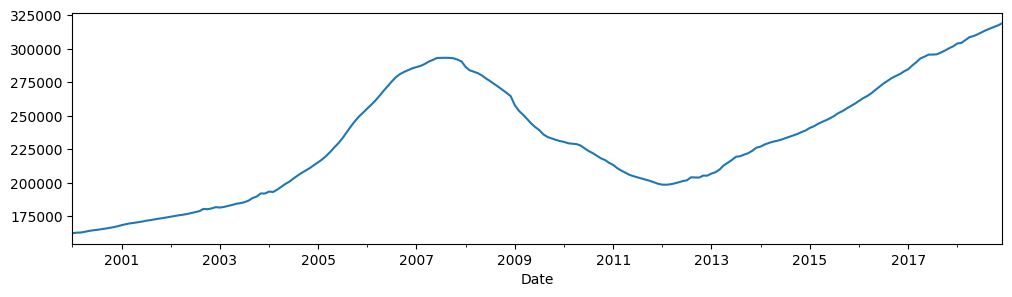

In [48]:
# Define the series
ts = ts['Home Value']
# Plot
ts.plot();

In [49]:
# decompose time seriesto detcet seasonality
decompo = sm.tsa.seasonal_decompose(ts)

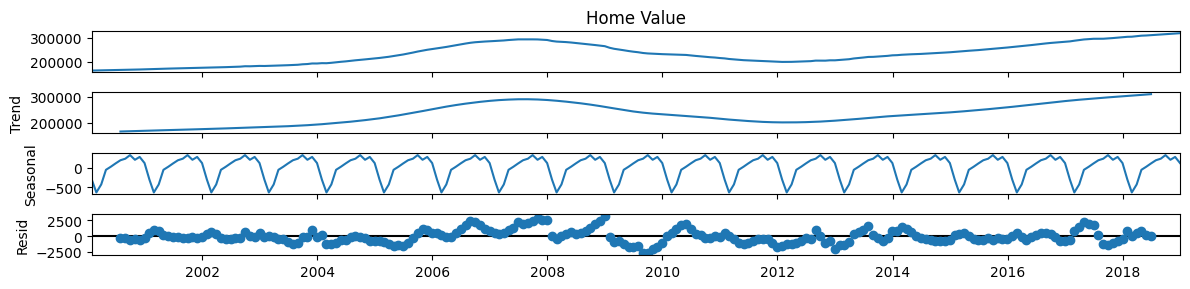

In [50]:
# plot decomposetion
decompo.plot()
plt.show()

- **it is a seasonal data set so i will use seasonal model and its cycle repeat every 12 months.**

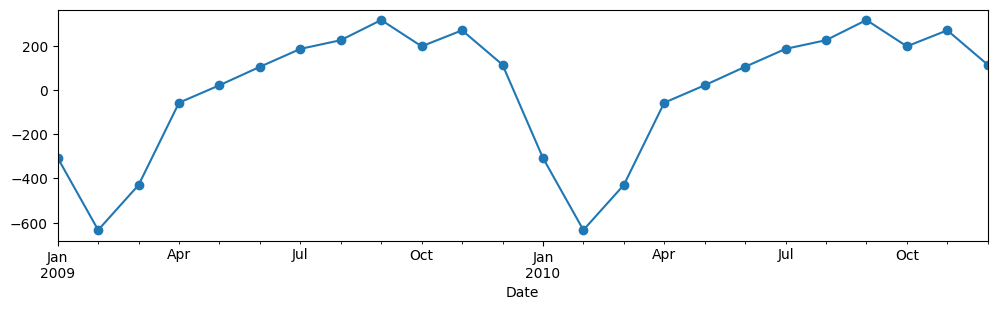

In [73]:
# Narrow down the date range of the plot
seasonal = decompo.seasonal
ax = seasonal.loc['2009': '2010'].plot(marker = 'o')

- there is seasonality,  m =52

In [74]:
# determine d
d = ndiffs(ts)
print (f'd = {d}')

d = 2


In [75]:
# Determine D
D = nsdiffs(ts, m =52)
print(f'D = {D}')

D = 0


In [76]:
# Difference the data
ts_diff = ts.diff().dropna()

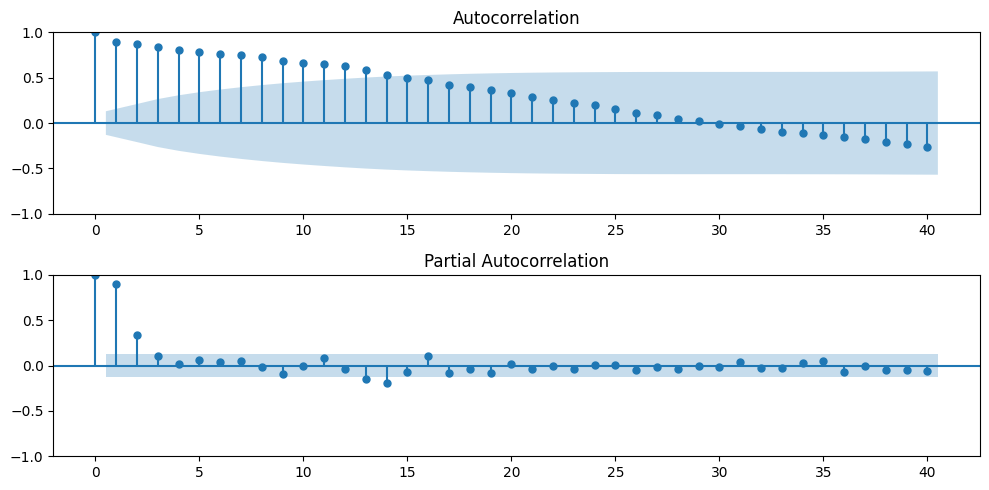

In [77]:
# We can use our function to highlight the seasonal lags by adding the arguments
plot_acf_pacf(ts_diff, annotate_seas=True, m = 52);

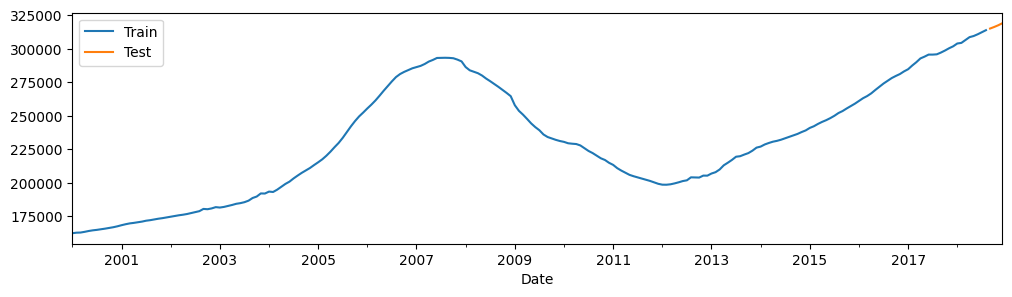

In [78]:
# tts so test size is 4 lags
test_lags = 4
train, test = train_test_split(ts, test_size= test_lags)
ax = train.plot(label='Train')
test.plot(ax=ax, label='Test')
ax.legend();

In [79]:
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 1  # nonseasonal differencing
q = 0  # nonseasonal MA

# Orders for seasonal components
P = 1  # Seasonal AR
D = 0  # Seasonal differencing
Q = 1  # Seasonal MA
m = 52 # Seasonal period

sarima = tsa.ARIMA(train, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

# Obtain summary
sarima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         Home Value   No. Observations:                  224
Model:             ARIMA(1, 1, 0)x(1, 0, [1], 52)   Log Likelihood               -1988.588
Date:                            Tue, 26 Nov 2024   AIC                           3985.176
Time:                                    18:48:10   BIC                           3998.804
Sample:                                01-31-2000   HQIC                          3990.678
                                     - 08-31-2018                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0461      0.005      9.299      0.000       0.036       0.056
ar.S.L52      -1.0000      0.467     -2.141      0.032      -1.916      -0.084
ma.S.L52       1.0000      0.468      2.138      0.032       0.083       1.917
sigma2      3.229e+06   8.15e-08   3.96e+13      0.000    3.23e+06    3.23e+06
===================================================================================
Ljung-Box (L1) (Q):                 159.62   Jarque-Bera (JB):                47.28
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.79   Skew:                            -0.88
Prob(H) (two-sided):                  0.30   Kurtosis:                         4.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 2.64e+30. Standard errors may be unstable.
"""

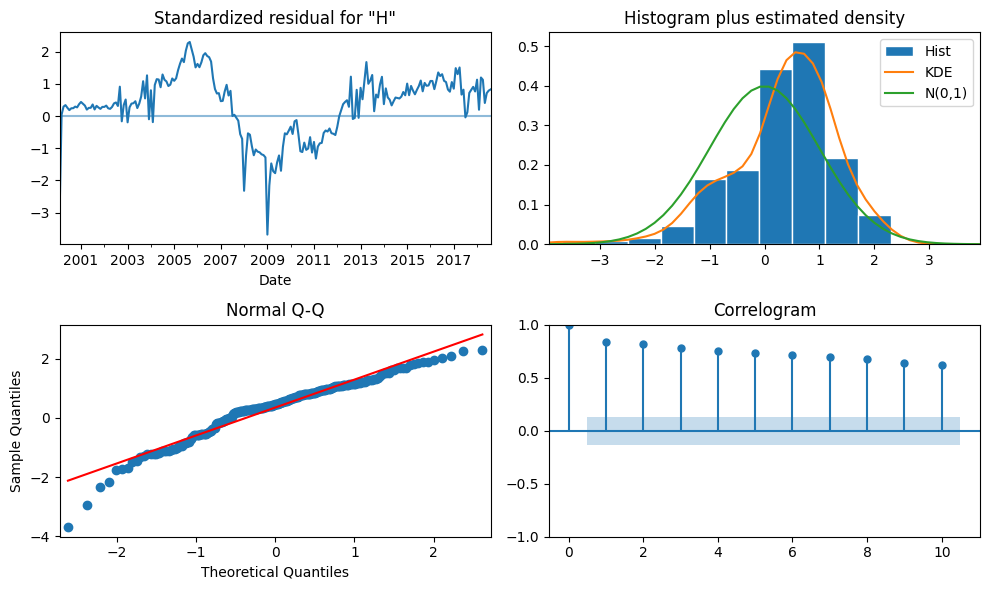

In [80]:
# Obtain diagnostic plots
fig = sarima.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- in Correlogram, we got some significant residuals

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 3,031.749
- MSE = 11,373,278.857
- RMSE = 3,372.429
- R^2 = -4.205
- MAPE = 0.95%


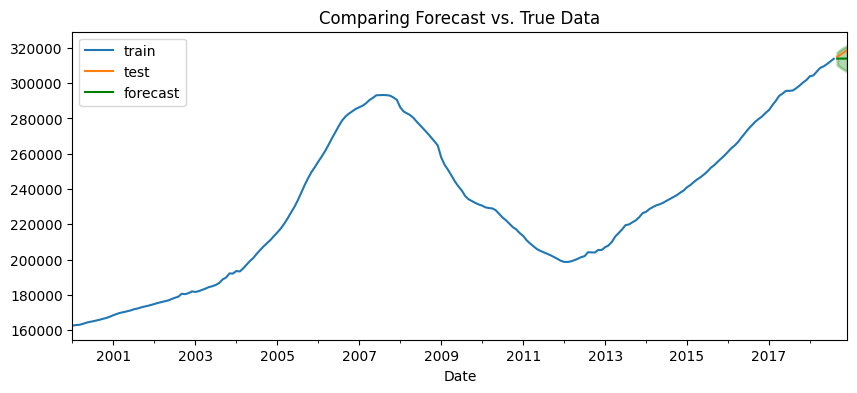

In [81]:
# Obtain forecast as a dataframe with confidence intervals
forecast_df = sarima.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

- Auto Arima


In [82]:
import pmdarima as pm

# Default auto_arima will select model based on AIC score
auto_model = pm.auto_arima(
    train,
    seasonal=True,
    m=52,
    trace=True
)

Performing stepwise search to minimize aic
 ARIMA(2,2,2)(1,0,1)[52]             : AIC=inf, Time=19.03 sec
 ARIMA(0,2,0)(0,0,0)[52]             : AIC=3587.903, Time=0.02 sec
 ARIMA(1,2,0)(1,0,0)[52]             : AIC=3592.923, Time=0.51 sec
 ARIMA(0,2,1)(0,0,1)[52]             : AIC=3592.954, Time=0.84 sec
 ARIMA(0,2,0)(1,0,0)[52]             : AIC=3589.714, Time=0.81 sec
 ARIMA(0,2,0)(0,0,1)[52]             : AIC=3589.529, Time=1.88 sec
 ARIMA(0,2,0)(1,0,1)[52]             : AIC=inf, Time=7.33 sec
 ARIMA(1,2,0)(0,0,0)[52]             : AIC=3589.093, Time=0.12 sec
 ARIMA(0,2,1)(0,0,0)[52]             : AIC=3591.374, Time=0.10 sec
 ARIMA(1,2,1)(0,0,0)[52]             : AIC=3592.565, Time=0.57 sec
 ARIMA(0,2,0)(0,0,0)[52] intercept   : AIC=3589.889, Time=0.06 sec

Best model:  ARIMA(0,2,0)(0,0,0)[52]          
Total fit time: 31.474 seconds


In [83]:
# the auto_arima will store our best nonseasonal and seasonal orders separtely
print(auto_model.order)
print(auto_model.seasonal_order)

(0, 2, 0)
(0, 0, 0, 52)


In [84]:
# Obtain summary of the best model from auto_arima
auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  224
Model:               SARIMAX(0, 2, 0)   Log Likelihood               -1792.952
Date:                Tue, 26 Nov 2024   AIC                           3587.903
Time:                        18:51:38   BIC                           3591.306
Sample:                    01-31-2000   HQIC                          3589.277
                         - 08-31-2018                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2      6.023e+05   2.94e+04     20.483      0.000    5.45e+05     6.6e+05
===================================================================================
Ljung-Box (L1) (Q):                  31.97   Jarque-Bera (JB):               321.48
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.57   Skew:                            -1.07
Prob(H) (two-sided):                  0.05   Kurtosis:                         8.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

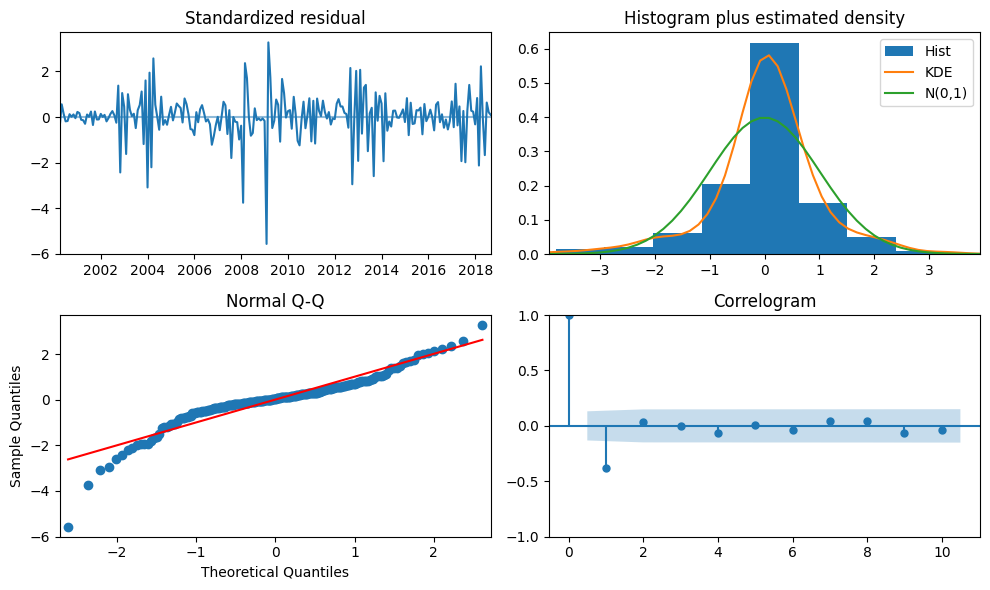

In [85]:
# Obtain diagnostic plots
fig = auto_model.plot_diagnostics()
fig.set_size_inches(10,6)
fig.tight_layout()

- on Correlogram, we have significant residuals.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


------------------------------------------------------------
Regression Metrics: 
------------------------------------------------------------
- MAE = 780.140
- MSE = 685,609.948
- RMSE = 828.016
- R^2 = 0.686
- MAPE = 0.25%


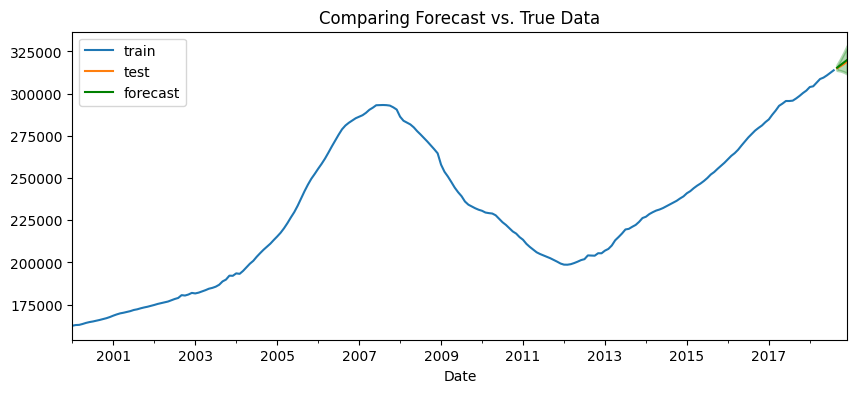

In [86]:
# Use auto_arima parameters to fit an ARIMA
auto_model = tsa.ARIMA(
    train, order=auto_model.order, seasonal_order=auto_model.seasonal_order
).fit()


# Obtain forecast as a dataframe with confidence intervals
forecast_df = auto_model.get_forecast(steps=len(test)).summary_frame()
# Call the custom function to plot the forecasts with confidence intervals and true values
plot_forecast(train, test, forecast_df);
# Obtain metrics
regression_metrics_ts(test, forecast_df['mean'])

### FInal Model

> initial model
- Regression metric
- (1, 1, 0)(1, 0, 1, 52)
  

- MAE = 3,031.749
- MSE = 11,373,278.857
- RMSE = 3,372.429
- R^2 = -4.205
- MAPE = 0.95%

> Auto Arima
- Regression metric
- (0,2,0)(0,0,0,52)

- MAE = 780.140
- MSE = 685,609.948
- RMSE = 828.016
- R^2 = 0.686
- MAPE = 0.25%

- We choose Auto Arima Model it has better regression metrics and best parameters

In [87]:
# These are the parameters of our final model
# Orders for non seasonal components
p = 1  # nonseasonal AR
d = 2  # nonseasonal differencing
q = 1  # nonseasonal MA

# Orders for seasonal components
P = 0  # Seasonal AR
D = 0  # Seasonal differencing
Q = 0  # Seasonal MA
m = 52 # Seasonal period

final_model = tsa.ARIMA(ts, order = (p,d,q), seasonal_order=(P,D,Q,m)).fit()

In [88]:
len(test)

4

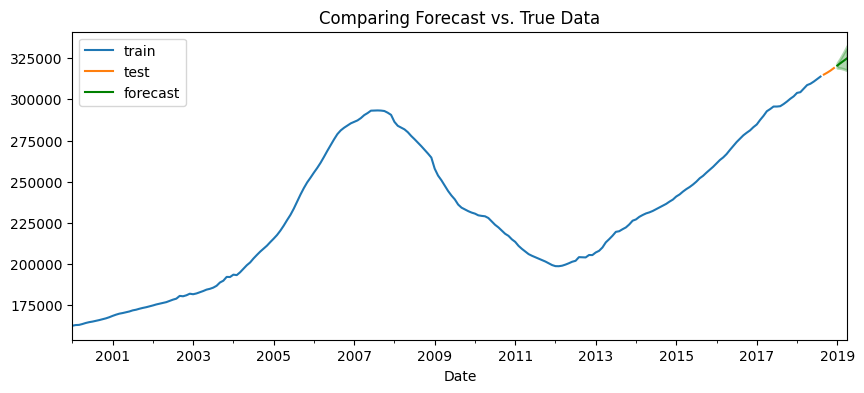

In [89]:
# Obtain future forecasts beyond test data
forecast_df  = final_model.get_forecast(len(test)).summary_frame()
plot_forecast(train,test,forecast_df);

In [90]:
forecast_df.index[0],forecast_df.index[-1]

(Timestamp('2019-01-31 00:00:00'), Timestamp('2019-04-30 00:00:00'))

In [91]:
starting_value = forecast_df['mean'].iloc[0]
starting_value

320538.1615726749

In [92]:
final_value = forecast_df['mean'].iloc[-1]
final_value

325065.1476392193

In [93]:
change = final_value - starting_value
change

4526.9860665444285

In [94]:
perc_change = (change / starting_value) * 100
perc_change


1.412307989892191

#  Tableau Workbook

- **link of the tableau workbook**  [Link Text](https://public.tableau.com/views/Book3_17327326068680/Story4?:language=en-US&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link)